In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importation des classes
from src.config.config import Config
from src.data.dataset_loader import DatasetLoader
from src.preprocessing.preprocessor import Preprocessor
from src.evaluation.model_evaluator import ModelEvaluator
from src.experiment.experiment import Experiment
from src.models.random_forest import RandomForestClassifierModel
from src.models.logistic_regression  import LogisticRegressionClassifierModel
from src.models.knn import KNNClassifierModel

## Visualisation des données

In [2]:
# Affichage des 10 premières données d'entrainement
pd.read_csv('data/raw/test.csv.zip')
train_data=pd.read_csv('data/raw/train.csv.zip')
train_data.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


## Méthodes de classification

In [3]:
# Instancier les paramètres globaux
config = Config(
    random_state=42,
    cv_folds=5,
    scoring="accuracy",
    test_size=0.2
)

In [4]:
# Charger les données
dataset_loader = DatasetLoader(
    data_path=f"{config.data_dir}/{config.train_file}",
    target_column="species",
    test_size=config.test_size,
    random_state=config.random_state,
)

x_train, x_test, y_train, y_test = dataset_loader.load_and_split()

In [5]:
# Pipeline de transformation des données
preprocessor = Preprocessor()

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

In [6]:
# Déclaration des modèles de classification
classifiers = [
    RandomForestClassifierModel(config.random_state),
    LogisticRegressionClassifierModel(config.random_state),
    KNNClassifierModel(config.random_state),
]

In [7]:
# Déclaration de l'évaluateur des modèles
evaluator = ModelEvaluator(
    cv_folds=config.cv_folds,
    scoring=config.scoring
)

In [8]:
# Entrainement des modèles de classification
results = []

for classifier in classifiers:
    experiment = Experiment(
        classifier=classifier,
        evaluator=evaluator
    )

    results.append(
        experiment.run(
            x_train=x_train_processed,
            y_train=y_train
        )
    )

In [9]:
# Affichage des résultats des modèles
for r in results:
    r["test_score"] = r["best_estimator"].score(
        x_test_processed,
        y_test
    )

results_df = pd.DataFrame(results)[
    ["model_name", "best_score", "test_score"]
].sort_values(
    by="best_score",
    ascending=False
)

results_df

,model_name,best_score,test_score
1,LogisticRegressionClassifierModel,0.986108,0.989899
0,RandomForestClassifierModel,0.975997,0.984848
2,KNNClassifierModel,0.958307,0.974747


In [10]:
# Sélection du meilleur modèle
best_row = results_df.iloc[0]
best_model_name = best_row["model_name"]

print(f"Selected model: {best_model_name}")
print(
    f"Final test accuracy : "
    f"{best_row['test_score']:.4f}"
)

best_model = next(
    r["best_estimator"]
    for r in results
    if r["model_name"] == best_model_name
)

Selected model: LogisticRegressionClassifierModel
Final test accuracy : 0.9899


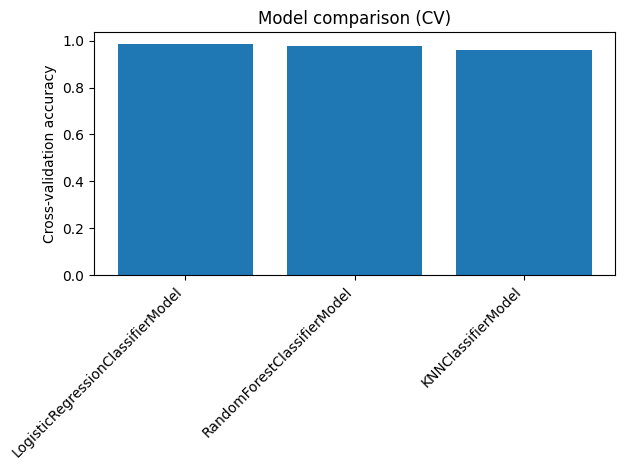

In [11]:
# Comparaison des performances en validation croisée
plt.figure()
plt.bar(
    results_df["model_name"],
    results_df["best_score"]
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cross-validation accuracy")
plt.title("Model comparison (CV)")
plt.tight_layout()
plt.show()

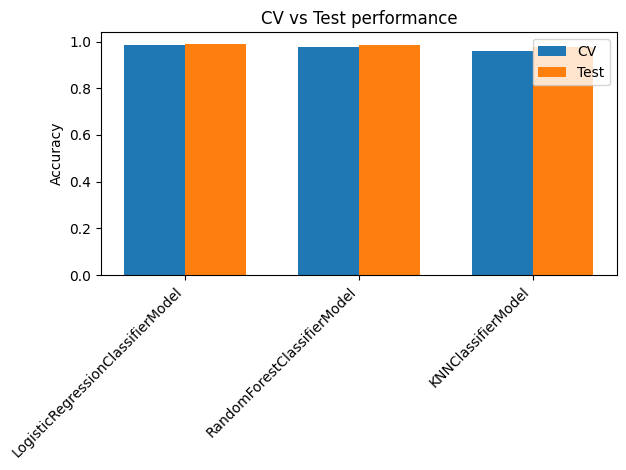

In [12]:
# Comparaison CV vs Test
model_names = results_df["model_name"]
x = np.arange(len(model_names))
width = 0.35

plt.figure()

plt.bar(
    x - width / 2,
    results_df["best_score"],
    width,
    label="CV"
)

plt.bar(
    x + width / 2,
    results_df["test_score"],
    width,
    label="Test"
)

plt.xticks(x, model_names, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("CV vs Test performance")
plt.legend()
plt.tight_layout()
plt.show()